# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS4_QUARTER_ELLIPSE_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,1.8,0.1,0.01,0.800,0.05,0.057972,0.794500,0.629189,0.452786
1,1.0,1.8,0.1,0.01,0.800,0.05,0.069428,0.808659,0.640253,0.460847
2,1.0,1.8,0.1,0.01,0.800,0.05,0.080884,0.825606,0.653494,0.470449
3,1.0,1.8,0.1,0.01,0.800,0.05,0.092340,0.844710,0.668392,0.481362
4,1.0,1.8,0.1,0.01,0.800,0.05,0.103796,0.865367,0.684549,0.493185
...,...,...,...,...,...,...,...,...,...,...
6938363,72274.0,100.0,10.0,0.05,0.125,0.05,1.467062,1.425141,1.191121,0.359978
6938364,72274.0,100.0,10.0,0.05,0.125,0.05,1.478518,1.392947,1.164330,0.351976
6938365,72274.0,100.0,10.0,0.05,0.125,0.05,1.489974,1.362775,1.139093,0.344499
6938366,72274.0,100.0,10.0,0.05,0.125,0.05,1.501431,1.336191,1.117289,0.337789


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

54206


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.4
  0.4444  0.5     0.5714  0.667   0.75    0.8     1.      1.25    1.333
  1.5     1.75    2.      2.25    2.5     3.      4.      5.      6.
  7.      8.      9.     10.    ]
Different phi values:  [0.05792282 0.05792298 0.05792313 ... 1.51309397 1.51313336 1.5131826 ]


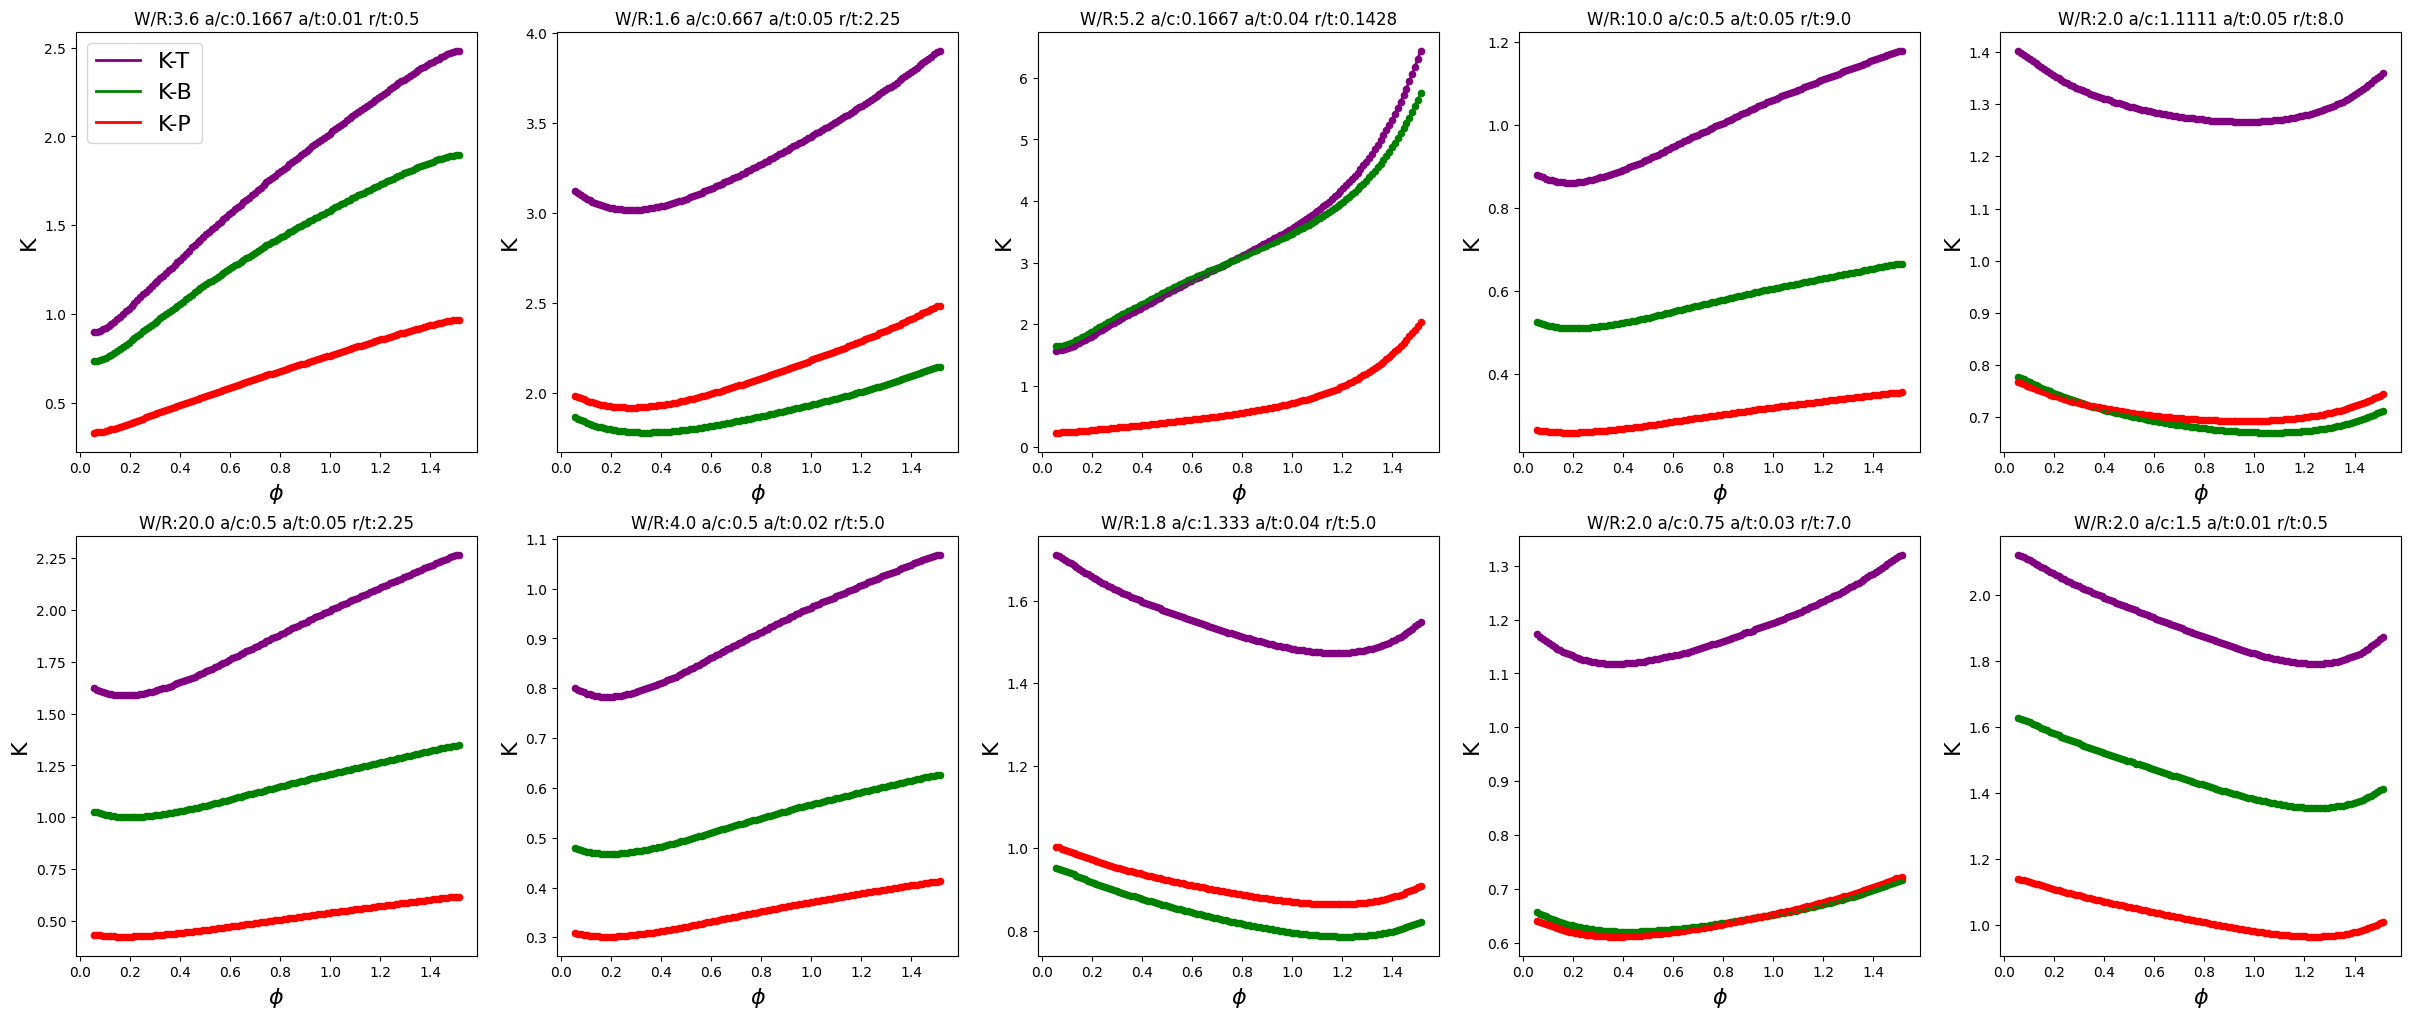

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS4_QUARTER_ELLIPSE_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,1.6,0.1,0.01,0.800,0.05,0.057972,0.885891,0.726188,0.554962
1,0.0,1.6,0.1,0.01,0.800,0.05,0.069428,0.901805,0.739002,0.564890
2,0.0,1.6,0.1,0.01,0.800,0.05,0.080884,0.920694,0.754338,0.576759
3,0.0,1.6,0.1,0.01,0.800,0.05,0.092340,0.941999,0.771548,0.590078
4,0.0,1.6,0.1,0.01,0.800,0.05,0.103796,0.965089,0.790230,0.604541
...,...,...,...,...,...,...,...,...,...,...
2312827,72263.0,5.8,10.0,0.05,0.125,0.05,1.467062,1.476913,1.245968,0.500624
2312828,72263.0,5.8,10.0,0.05,0.125,0.05,1.478518,1.443864,1.217927,0.489433
2312829,72263.0,5.8,10.0,0.05,0.125,0.05,1.489974,1.413711,1.191692,0.479111
2312830,72263.0,5.8,10.0,0.05,0.125,0.05,1.501431,1.386081,1.168271,0.469804


In [7]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

18069


In [8]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.4
  0.4444  0.5     0.5714  0.667   0.75    0.8     1.      1.25    1.333
  1.5     1.75    2.      2.25    2.5     3.      4.      5.      6.
  7.      8.      9.     10.    ]
Different phi values:  [0.05792282 0.05792298 0.05792313 ... 1.51309397 1.51313336 1.5131826 ]


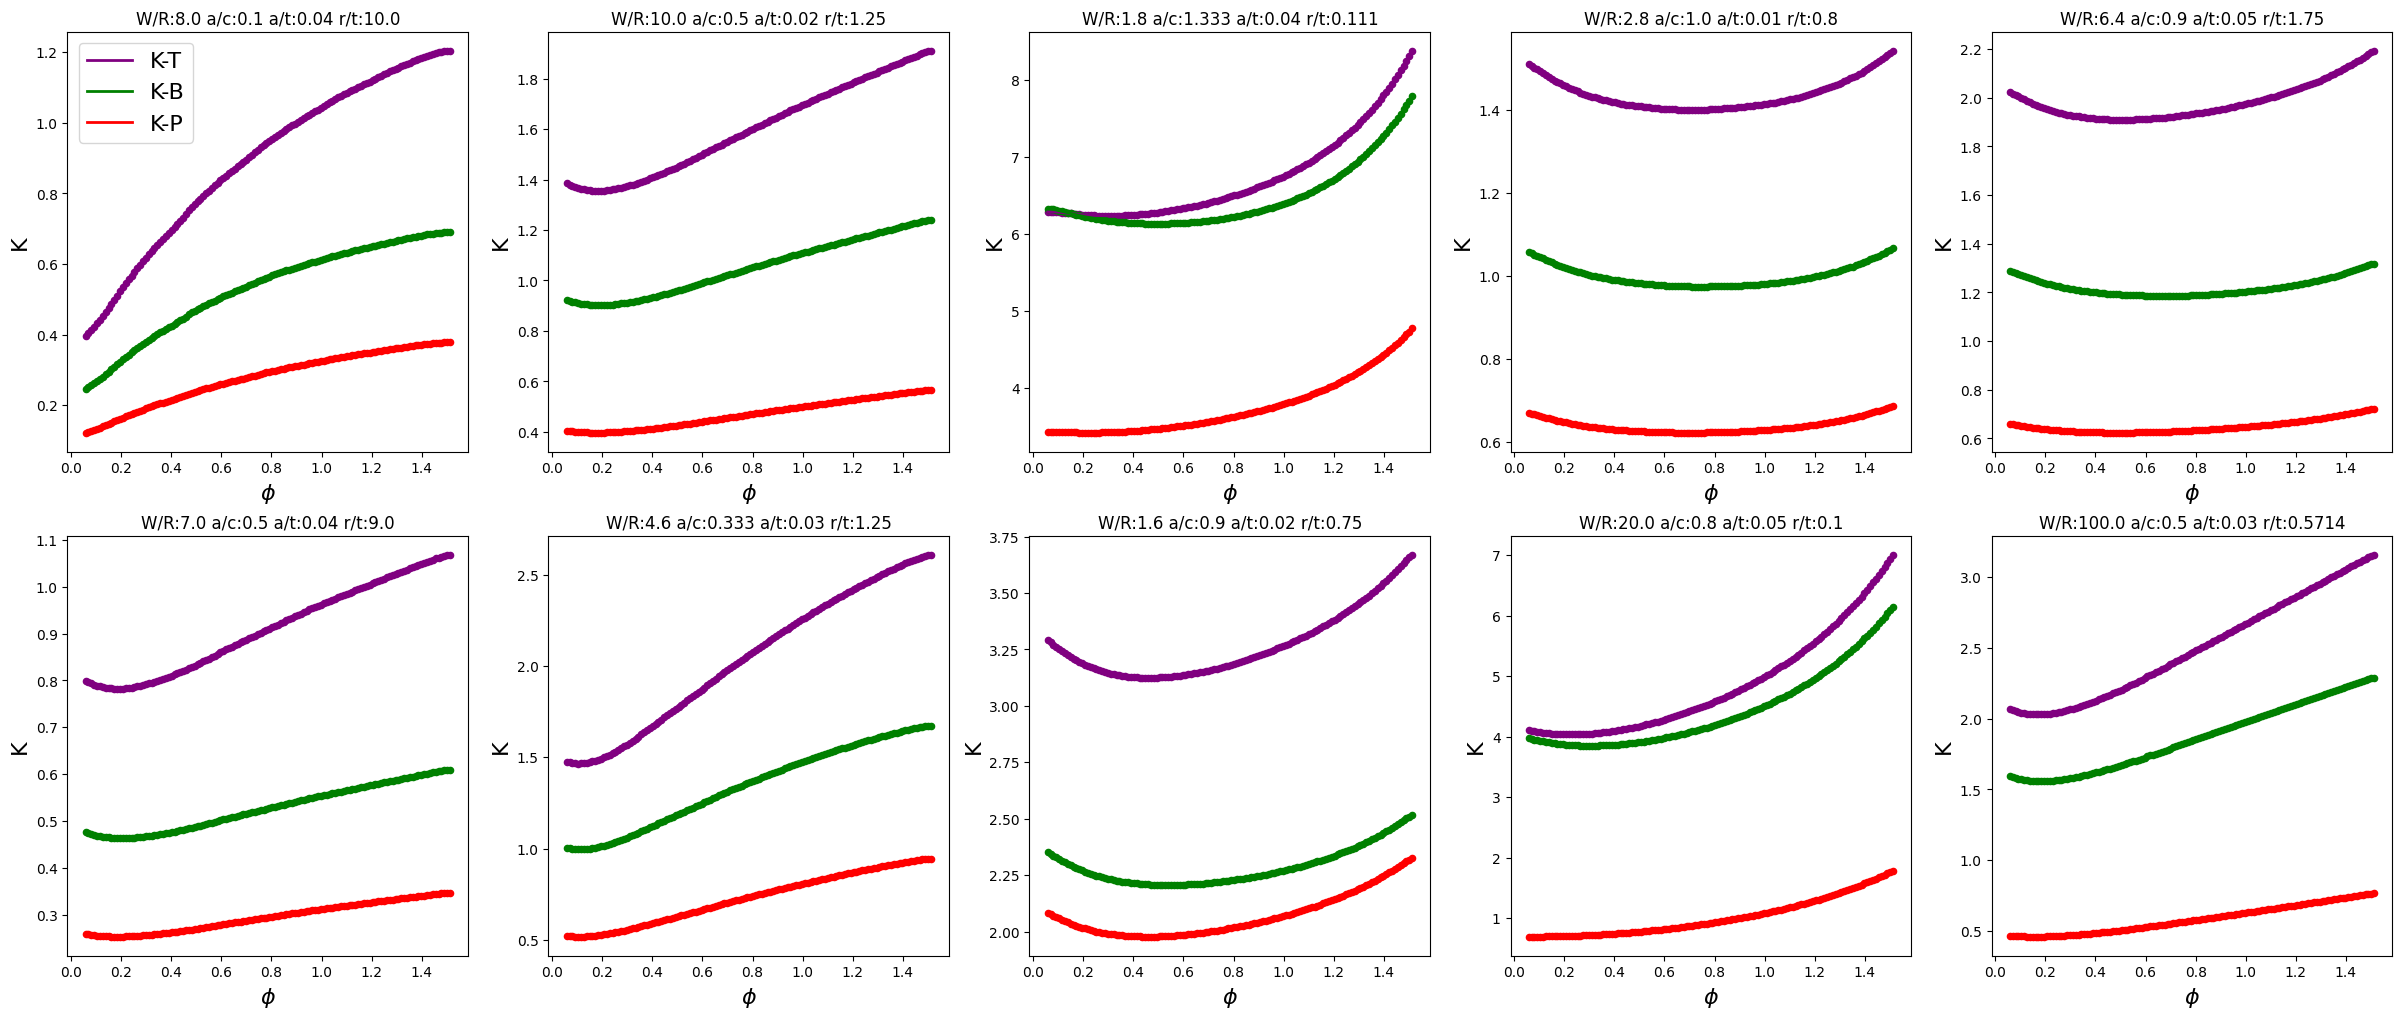

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()